In [1]:
import cv2

## 1.2.1 Getting Started with Images

In [2]:
img = cv2.imread('test.jpg', 0)

In [3]:
cv2.imshow('image',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [4]:
cv2.imshow('test.jpg',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [5]:
cv2.namedWindow('test.jpg', cv2.WINDOW_NORMAL)
cv2.imshow('test.jpg',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [6]:
cv2.imwrite('test.jpg',img)

True

In [7]:
cv2.imshow('test.jpg',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [8]:
import numpy as np
import cv2

In [4]:
img = cv2.imread('test.jpg',0)
cv2.imshow('test.jpg',img)
k = cv2.waitKey(0)
if k == 27: # wait for ESC key to exit
    cv2.destroyAllWindows()
elif k == ord('s'): # wait for 's' key to save and exit
    cv2.imwrite('test.jpg',img)
    cv2.destroyAllWindows()

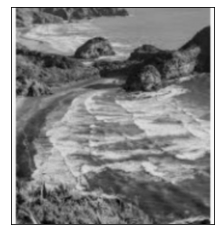

In [2]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

img = cv2.imread('test.jpg',0)
plt.imshow(img, cmap = 'gray', interpolation = 'bicubic')
plt.xticks([]), plt.yticks([]) # to hide tick values on X and Y axis
plt.show()

## 1.2.3 Drawing Functions in OpenCV

In [6]:
import numpy as np
import cv2

# Create a black image
img = np.zeros((512,512,3), np.uint8)# height, width

# Draw a diagonal blue line with thickness of 5 px
img = cv2.line(img,(0,0),(511,511),(255,0,0),5) # x, y

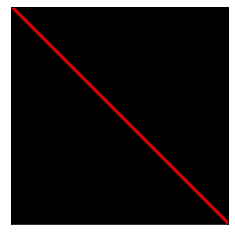

In [7]:
plt.imshow(img, cmap = 'gray', interpolation = 'bicubic')
plt.xticks([]), plt.yticks([]) # to hide tick values on X and Y axis
plt.show()

In [14]:
img = cv2.rectangle(img,(384,0),(510,128),(0,255,0),3)

In [15]:
img = cv2.circle(img,(447,63), 63, (0,0,255), -1)


In [16]:
img = cv2.ellipse(img,(256,256),(100,50),0,0,180,255,-1)

In [17]:
pts = np.array([[10,5],[20,30],[70,20],[50,10]], np.int32)
pts = pts.reshape((-1,1,2))
img = cv2.polylines(img,[pts],True,(0,255,255))

In [11]:
font = cv2.FONT_HERSHEY_SIMPLEX
cv2.putText(img,'OpenCV',(10,500), font, 4,(255,255,255),8,cv2.LINE_AA)

array([[[255,   0,   0],
        [255,   0,   0],
        [255,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[255,   0,   0],
        [255,   0,   0],
        [255,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[255,   0,   0],
        [255,   0,   0],
        [255,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       ...,

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [255,   0,   0],
        [255,   0,   0],
        [255,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [255,   0,   0],
        [255,   0,   0],
        [255,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [255,   0,   0],
        [255,   0,   0],
        [255,   0,   0]]

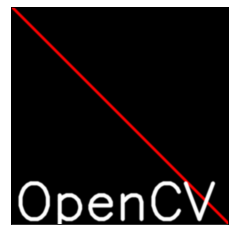

In [12]:
plt.imshow(img, cmap = 'gray', interpolation = 'bicubic')
plt.xticks([]), plt.yticks([]) # to hide tick values on X and Y axis
plt.show()

## 1.2.4 Mouse as a Paint-Brush

In [19]:
import cv2

In [20]:
events = [i for i in dir(cv2) if 'EVENT' in i]

In [22]:
print (events)

['EVENT_FLAG_ALTKEY', 'EVENT_FLAG_CTRLKEY', 'EVENT_FLAG_LBUTTON', 'EVENT_FLAG_MBUTTON', 'EVENT_FLAG_RBUTTON', 'EVENT_FLAG_SHIFTKEY', 'EVENT_LBUTTONDBLCLK', 'EVENT_LBUTTONDOWN', 'EVENT_LBUTTONUP', 'EVENT_MBUTTONDBLCLK', 'EVENT_MBUTTONDOWN', 'EVENT_MBUTTONUP', 'EVENT_MOUSEHWHEEL', 'EVENT_MOUSEMOVE', 'EVENT_MOUSEWHEEL', 'EVENT_RBUTTONDBLCLK', 'EVENT_RBUTTONDOWN', 'EVENT_RBUTTONUP']


In [13]:
import cv2
import numpy as np

In [13]:
# mouse callback function
def draw_circle(event,x,y,flags,param):
    if event == cv2.EVENT_LBUTTONDBLCLK:
        cv2.circle(img,(x,y),100,(255,0,0),-1)
        
# Create a black image, a window and bind the function to window
img = np.zeros((512,512,3), np.uint8)
cv2.namedWindow('image')
cv2.setMouseCallback('image',draw_circle)

while(1):
    cv2.imshow('image',img)
    if cv2.waitKey(20) & 0xFF == 27:
        break
cv2.destroyAllWindows()

In [21]:
import cv2
import numpy as np

drawing = False # true if mouse is pressed
mode = True # if True, draw rectangle. Press 'm' to toggle to curve
ix,iy = -1,-1

# mouse callback function
def draw_circle(event,x,y,flags,param):
    global ix,iy,drawing,mode
    
    if event == cv2.EVENT_LBUTTONDOWN:
        drawing = True
        ix,iy = x,y
        
    elif event == cv2.EVENT_MOUSEMOVE:
        if drawing == True:
            if mode == True:
                cv2.rectangle(img,(ix,iy),(x,y),(0,255,0),-1)
            else:
                cv2.circle(img,(x,y),5,(0,0,255),-1)
            
    elif event == cv2.EVENT_LBUTTONUP:
        drawing = False
        if mode == True:
            cv2.rectangle(img,(ix,iy),(x,y),(0,255,0),-1)
        else:
            cv2.circle(img,(x,y),5,(0,0,255),-1)


In [23]:
img = np.zeros((512,512,3), np.uint8)
cv2.namedWindow('image')
cv2.setMouseCallback('image',draw_circle)

while(1):
    cv2.imshow('image',img)
    k = cv2.waitKey(1) & 0xFF
    if k == ord('m'):
        mode = not mode
    elif k == 27:
        break
        
cv2.destroyAllWindows()

## 1.2.5 Trackbar as the Color Palette

In [2]:
import cv2
import numpy as np

def nothing(x):
    pass

# Create a black image, a window
img = np.zeros((300,512,3), np.uint8)
cv2.namedWindow('image')

# create trackbars for color change
cv2.createTrackbar('R','image',0,255,nothing)
cv2.createTrackbar('G','image',0,255,nothing)
cv2.createTrackbar('B','image',0,255,nothing)

# create switch for ON/OFF functionality
switch = '0 : OFF \n1 : ON'
cv2.createTrackbar(switch, 'image',0,1,nothing)

while(1):
    cv2.imshow('image',img)
    k = cv2.waitKey(1) & 0xFF
    if k == 27:
        break
        
    # get current positions of four trackbars
    r = cv2.getTrackbarPos('R','image')
    g = cv2.getTrackbarPos('G','image')
    b = cv2.getTrackbarPos('B','image')
    s = cv2.getTrackbarPos(switch,'image')
    
    if s == 0:
        img[:] = 0
    else:
        img[:] = [b,g,r]
        
cv2.destroyAllWindows()